In [78]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# _1. Data Loading_

In [79]:
#1.	Load the sample dataset into a Pandas DataFrame
df=pd.read_csv("C:/Users/TestFix123/OneDrive/Desktop/CUVETTE MACHINE LEARNING/ML_Exercise18(AL-NLP,NN,DL_Spam_Classification)/Spam_SMS.csv")

In [80]:
#2.	Inspect the first few rows to understand the structure of the data
df.head()

,Class,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [81]:
df.tail()

,Class,Message
5569,spam,This is the 2nd time we have tried 2 contact u...
5570,ham,Will ü b going to esplanade fr home?
5571,ham,"Pity, * was in mood for that. So...any other s..."
5572,ham,The guy did some bitching but I acted like i'd...
5573,ham,Rofl. Its true to its name


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Class    5574 non-null   object
 1   Message  5574 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [83]:
df.describe()

,Class,Message
count,5574,5574
unique,2,5159
top,ham,"Sorry, I'll call later"
freq,4827,30


In [84]:
#3.	Check for any missing or null values and handle them appropriately
df.isnull().sum()

Class      0
Message    0
dtype: int64

In [85]:
df.duplicated().sum()

np.int64(415)

In [86]:
#droping or deleting the duplicates
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

# _2. Text Preprocessing_

In [87]:
! pip install wordcloud

In [88]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [89]:
import nltk
print(nltk.__version__)

3.9.1


In [90]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\TestFix123\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [93]:
# corpus=[]
# for i in range(len(df)):
#     review=re.sub('[^a-zA-Z]','',df['Message'].iloc[i])
#     review=review.lower()
#     review=review.split()
#     review=[word for word in review if word not in stopwords.words('english')]
#     ps=PorterStemmer()
#     review=[ps.stem(word) for word in review if word not in stopwords.words('english')]
#     review=' '.join(review)
#     corpus.append(review)
#     print(corpus[i], end="\n")
       


#this is more optimized as we don't have to call PorterStemmer everytime in the loop
ps = PorterStemmer()
stop_words = set(stopwords.words('english'))
whl=WordNetLemmatizer()

corpus = []

for i in range(len(df)):
    # 2.Remove Punctuations and Special Characters
    message = re.sub('[^a-zA-Z]', ' ', df['Message'].iloc[i])  
    # 1.Lowercasing
    message = message.lower()
    # 4.Tokenization
    message = message.split()  
    # 3.Stop Word Removal
    message = [word for word in message if word not in stop_words]
    # Stemming
    message = [ps.stem(word) for word in message]
    # 5.Lemmatization
    #message = [whl.lemmatize(word) for word in message]
    message = ' '.join(message)
    corpus.append(message)
    #print(corpus[i])
print(corpus[:10])

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat', 'ok lar joke wif u oni', 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli', 'u dun say earli hor u c alreadi say', 'nah think goe usf live around though', 'freemsg hey darl week word back like fun still tb ok xxx std chg send rcv', 'even brother like speak treat like aid patent', 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun', 'winner valu network custom select receivea prize reward claim call claim code kl valid hour', 'mobil month u r entitl updat latest colour mobil camera free call mobil updat co free']


# _3. Feature Extraction_

In [94]:
# 1.Bag of Words
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv=CountVectorizer(max_features=1000)
X=cv.fit_transform(corpus).toarray()

# 2.TF-IDF
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(corpus).toarray()
print("TF-IDF matrix shape:", X.shape)
print("Sample feature names:", tfidf.get_feature_names_out()[:100])

X

TF-IDF matrix shape: (5159, 6296)
Sample feature names: ['aa' 'aah' 'aaniy' 'aaooooright' 'aathi' 'ab' 'abbey' 'abdomen' 'abeg'
 'abel' 'aberdeen' 'abi' 'abil' 'abiola' 'abj' 'abl' 'abnorm' 'abouta'
 'abroad' 'absenc' 'absolut' 'absolutli' 'abstract' 'abt' 'abta' 'aburo'
 'abus' 'ac' 'academ' 'acc' 'accent' 'accentur' 'accept' 'access' 'accid'
 'accident' 'accommod' 'accommodationvouch' 'accomod' 'accordin'
 'accordingli' 'account' 'accumul' 'ach' 'achan' 'achiev' 'acid'
 'acknowledg' 'acl' 'acnt' 'aco' 'across' 'act' 'actin' 'action' 'activ'
 'actor' 'actual' 'ad' 'adam' 'add' 'addamsfa' 'addi' 'addict' 'address'
 'adewal' 'adi' 'adjust' 'admin' 'administr' 'admir' 'admiss' 'admit'
 'ador' 'adp' 'adress' 'adrian' 'adrink' 'adsens' 'adult' 'advanc'
 'adventur' 'advic' 'advis' 'advisor' 'ae' 'aeronaut' 'aeroplan' 'afew'
 'affair' 'affect' 'affection' 'affidavit' 'afford' 'afghanistan' 'afraid'
 'africa' 'african' 'aft' 'afternon']


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(5159, 6296))

In [95]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(df['Class'])
print(le.classes_)   
display(set(y)) 
y

['ham' 'spam']


{np.int64(0), np.int64(1)}

array([0, 0, 1, ..., 0, 0, 0], shape=(5159,))

# _4. Model Training_

In [99]:
# 1.Split the dataset into training and testing sets (e.g., 80% training, 20% testing)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [101]:
# 2.Train a machine learning model using Logistic Regression Algorithm
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
# 3.Fit the model to the training data using the extracted features
log_reg.fit(X_train,y_train)

LogisticRegression()

# _5. Prediction_

In [103]:
# 1.Use the trained model to predict whether new messages are ham or spam
y_pred=log_reg.predict(X_test)
# 2.Store the predictions for evaluation
y_pred

array([0, 0, 0, ..., 0, 0, 0], shape=(1032,))

# _6. Evaluation_

In [110]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy_lrg=accuracy_score(y_test, y_pred)*100
print(f'Accuracy of Logistic Regression: {accuracy_lrg:.2f}%')
conf_matrix_lrg = confusion_matrix(y_test, y_pred)
conf_matrix_lrg

Accuracy of Logistic Regression: 96.71%


array([[909,   2],
       [ 32,  89]])

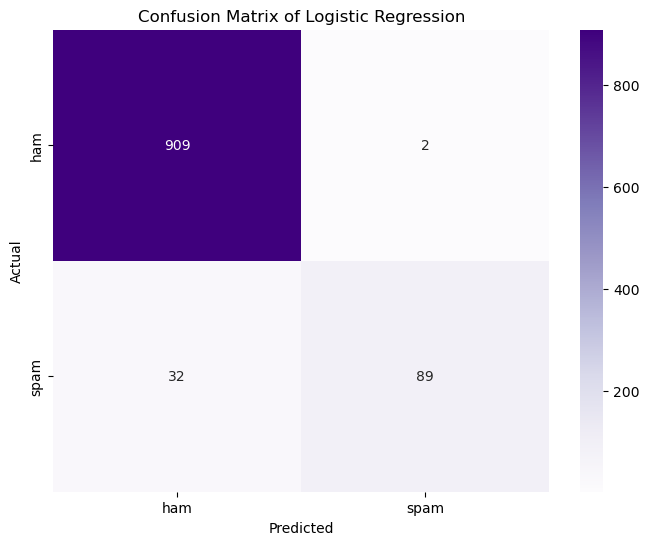

In [136]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lrg, annot=True, fmt='d', cmap='Purples', xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.title('Confusion Matrix of Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# __WORKING WITH RANDOM FOREST ALGORITHM__

In [112]:
from sklearn.ensemble import RandomForestClassifier

In [113]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [115]:
# 1.Use the trained model to predict whether new messages are ham or spam
y_pred_rf=rf.predict(X_test)
# 2.Store the predictions for evaluation
y_pred_rf

array([0, 0, 0, ..., 0, 0, 0], shape=(1032,))

In [117]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy_rf=accuracy_score(y_test, y_pred_rf)*100
print(f'Accuracy of Random Forest: {accuracy_rf:.2f}%')
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
conf_matrix_rf

Accuracy of Random Forest: 97.48%


array([[910,   1],
       [ 25,  96]])

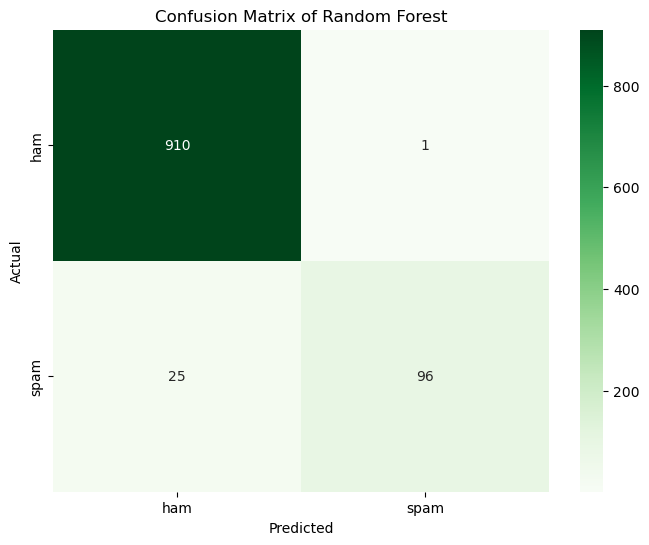

In [131]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Greens', xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.title('Confusion Matrix of Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# __WORKING WITH NAIVE BAYES ALGORITHM__

In [125]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [126]:
# 1.Use the trained model to predict whether new messages are ham or spam
y_pred_nb=model.predict(X_test)
# 2.Store the predictions for evaluation
y_pred_nb

array([0, 0, 0, ..., 0, 0, 0], shape=(1032,))

In [127]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy_nb=accuracy_score(y_test, y_pred_nb)*100
print(f'Accuracy of Naive Bayes: {accuracy_nb:.2f}%')
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
conf_matrix_nb

Accuracy of Naive Bayes: 96.80%


array([[911,   0],
       [ 33,  88]])

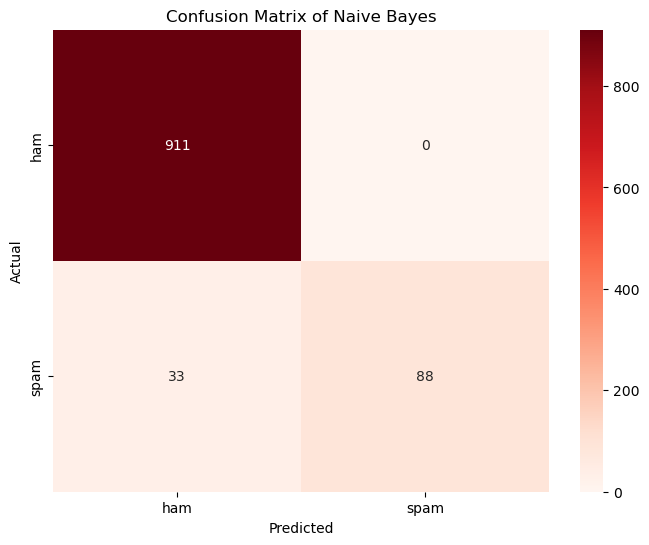

In [129]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Reds', xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.title('Confusion Matrix of Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ***COMPARISON***

BASED ON ACCURACY:<br>
>LOGISTIC REGRESSION: 96.71%<br>
RANDOM FOREST: 97.48%<br>
NAIVE BAYES: 96.80%

_***Random Forest*** is the better Alogrithm out of all when compared_